# Wrangling

I began reviewing and analyzing hate crimes data from the Austin PD datasets available at https://data.austintexas.gov in January of 2020. This is the first book of the analysis series, which will be updated frequently. In this notebook, I will load and complete the first stage of scrubbing the data, with some visualizations for guidance. 

In [1]:
# Importing the appropriate libraries and configurations
%matplotlib inline

import pandas as pd 
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# loading the datasets
path = r'C:\Users\Robert\Hate Crimes Analysis\datasets'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

In [2]:
plt.style.use('seaborn-white')

In [3]:
# Concatenate all datasets into one
df = pd.concat(dfs, ignore_index=True)

In [4]:
pd.set_option('display.max_columns', None)


# Examining the new dataset
display(df.shape)
print('----------------------------------')
display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
display(df.info())
print('----------------------------------')
display(df.isnull().sum())
print('----------------------------------')
display(df.index)
print('----------------------------------')
display(df.columns)
print('----------------------------------')
display(df.describe())

(240, 31)

----------------------------------


,Bias,Bias,Date of Incident,Date of Incident/Day of Week,Day of Week,Incident Number,Month,Notes,Number of Offenders over 18,Number of Offenders under 18,Number of Victims Over 18,Number of Victims over 18,Number of Victims under 18,Number of vitims under 18,Offense,Offense Location,Offense(s),Race or Ethnic of Offender,Race/Ethnic of Offender(s),Race/Ethnicity of Offenders,Victim Type,bias,date,incident_number,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,race/ethnicity_of_offender(s)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anti-black,2017-01-01,2017-241137,1.0,0.0,1.0,0.0,Aggravated Assault,Park/Playground,white
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anti-white,2017-02-01,2017-580344,1.0,0.0,1.0,0.0,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,black
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anti-jewish,2017-03-21,2017-800291,0.0,0.0,0.0,0.0,Destruction,Highway/Road/Alley/Street/Sidewalk,unknown
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anti-jewish,2017-04-12,2017-1021534,0.0,0.0,0.0,0.0,Simple Assault,Air/Bus/Train Terminal,white
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anti-lgbt,2017-05-15,2017-1351550,2.0,1.0,0.0,1.0,Simple Assault,Residence/Home,white


----------------------------------


,Bias,Bias,Date of Incident,Date of Incident/Day of Week,Day of Week,Incident Number,Month,Notes,Number of Offenders over 18,Number of Offenders under 18,Number of Victims Over 18,Number of Victims over 18,Number of Victims under 18,Number of vitims under 18,Offense,Offense Location,Offense(s),Race or Ethnic of Offender,Race/Ethnic of Offender(s),Race/Ethnicity of Offenders,Victim Type,bias,date,incident_number,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,race/ethnicity_of_offender(s)
235,NaN,Anti-Black or African American,6/4/2020 0:00,NaN,Thursday,2020-1560947,June,NaN,1.0,0.0,NaN,1.0,0.0,NaN,NaN,Residence/Home,Criminal Mischief,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,NaN,Anti-Black or African American,6/9/2020 0:00,NaN,Tuesday,2020-1610708,June,NaN,1.0,0.0,NaN,1.0,0.0,NaN,NaN,Streets/Highway/Road/Alley,Criminal Mischief,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,NaN,Anti-Black or African American,6/17/2020 0:00,NaN,Wednesday,2020-1690572,June,NaN,1.0,0.0,NaN,1.0,0.0,NaN,NaN,Parking Lot,Criminal Mischief,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,NaN,Anti-Black or African American,6/23/2020 0:00,NaN,Tuesday,2020-1750961,June,NaN,1.0,0.0,NaN,1.0,0.0,NaN,NaN,Streets/Highway/Road/Alley,Criminal Mischief,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,NaN,Anti-Gay (Male),7/24/2020 0:00,NaN,Friday,2020-2061031,July,NaN,1.0,0.0,NaN,1.0,0.0,NaN,NaN,Streets/Highway/Road/Alley,Aggravated Assault,NaN,NaN,White/Hispanic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 31 columns):
    Bias                         72 non-null object
Bias                             48 non-null object
Date of Incident                 48 non-null object
Date of Incident/Day of Week     72 non-null object
Day of Week                      48 non-null object
Incident Number                  120 non-null object
Month                            120 non-null object
Notes                            4 non-null object
Number of Offenders over 18      120 non-null float64
Number of Offenders under 18     120 non-null float64
Number of Victims Over 18        72 non-null float64
Number of Victims over 18        48 non-null float64
Number of Victims under 18       48 non-null float64
Number of vitims under 18        72 non-null float64
Offense                          34 non-null object
Offense Location                 120 non-null object
Offense(s)        

None

----------------------------------


    Bias                         168
Bias                             192
Date of Incident                 192
Date of Incident/Day of Week     168
Day of Week                      192
Incident Number                  120
Month                            120
Notes                            236
Number of Offenders over 18      120
Number of Offenders under 18     120
Number of Victims Over 18        168
Number of Victims over 18        192
Number of Victims under 18       192
Number of vitims under 18        168
Offense                          206
Offense Location                 120
Offense(s)                       154
Race or Ethnic of Offender       206
Race/Ethnic of Offender(s)       202
Race/Ethnicity of Offenders      192
Victim Type                      168
bias                             120
date                             120
incident_number                  120
number_of_offenders_over_18      120
number_of_offenders_under_18     120
number_of_victims_over_18        120
n

----------------------------------


RangeIndex(start=0, stop=240, step=1)

----------------------------------


Index(['    Bias', 'Bias', 'Date of Incident', 'Date of Incident/Day of Week',
       'Day of Week', 'Incident Number', 'Month', 'Notes',
       'Number of Offenders over 18', 'Number of Offenders under 18',
       'Number of Victims Over 18', 'Number of Victims over 18',
       'Number of Victims under 18', 'Number of vitims under 18', 'Offense',
       'Offense Location', 'Offense(s)', 'Race or Ethnic of Offender',
       'Race/Ethnic of Offender(s)', 'Race/Ethnicity of Offenders',
       'Victim Type', 'bias', 'date', 'incident_number',
       'number_of_offenders_over_18', 'number_of_offenders_under_18',
       'number_of_victims_over_18', 'number_of_victims_under_18', 'offense',
       'offense_location', 'race/ethnicity_of_offender(s)'],
      dtype='object')

----------------------------------


,Number of Offenders over 18,Number of Offenders under 18,Number of Victims Over 18,Number of Victims over 18,Number of Victims under 18,Number of vitims under 18,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18
count,120.000000,120.000000,72.000000,48.00000,48.000000,72.000000,120.000000,120.000000,120.000000,120.000000
mean,1.033333,0.116667,0.861111,1.00000,0.041667,0.055556,1.016667,0.116667,0.916667,0.050000
std,0.777124,0.488237,0.421451,0.29173,0.201941,0.230669,0.788396,0.488237,0.379813,0.218859
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,4.000000,3.000000,2.000000,2.00000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000


In [5]:
df.set_index(['Incident Number'], inplace=True)
df.sort_index(inplace=True)

display(df.index)
print('----------------------------------')
display(df.head())
print('----------------------------------')
display(df.tail())

Index(['2017-1021534', '2017-1021534', '2017-1351550', '2017-1351550',
       '2017-1550219', '2017-1550219', '2017-1660914', '2017-1660914',
       '2017-1681488', '2017-1681488',
       ...
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan],
      dtype='object', name='Incident Number', length=240)

----------------------------------


,Bias,Bias,Date of Incident,Date of Incident/Day of Week,Day of Week,Month,Notes,Number of Offenders over 18,Number of Offenders under 18,Number of Victims Over 18,Number of Victims over 18,Number of Victims under 18,Number of vitims under 18,Offense,Offense Location,Offense(s),Race or Ethnic of Offender,Race/Ethnic of Offender(s),Race/Ethnicity of Offenders,Victim Type,bias,date,incident_number,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,race/ethnicity_of_offender(s)
Incident Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-1021534,Anti-Jewish,NaN,NaN,04/12/2017/Wed,NaN,April,NaN,0.0,0.0,0.0,NaN,NaN,0.0,Simple Assault,Air/Bus/Train Terminal,NaN,White/Unknown,NaN,NaN,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-1021534,Anti-Jewish,NaN,NaN,04/12/2017/Wed,NaN,April,NaN,0.0,0.0,0.0,NaN,NaN,0.0,Simple Assault,Air/Bus/Train Terminal,NaN,White/Unknown,NaN,NaN,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-1351550,Anti-Gay (Male),NaN,NaN,05/15/2017/Mon,NaN,May,NaN,2.0,1.0,0.0,NaN,NaN,1.0,Simple Assault,Residence/Home,NaN,White/Not Hispanic,NaN,NaN,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-1351550,Anti-Gay (Male),NaN,NaN,05/15/2017/Mon,NaN,May,NaN,2.0,1.0,0.0,NaN,NaN,1.0,Simple Assault,Residence/Home,NaN,White/Not Hispanic,NaN,NaN,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-1550219,Anti-Gay (Male),NaN,NaN,06/04/2017/Sun,NaN,June,NaN,2.0,0.0,1.0,NaN,NaN,0.0,Simple Assault,Highway/Road/Alley/Street/Sidewalk,NaN,White/Unknown,NaN,NaN,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------


,Bias,Bias,Date of Incident,Date of Incident/Day of Week,Day of Week,Month,Notes,Number of Offenders over 18,Number of Offenders under 18,Number of Victims Over 18,Number of Victims over 18,Number of Victims under 18,Number of vitims under 18,Offense,Offense Location,Offense(s),Race or Ethnic of Offender,Race/Ethnic of Offender(s),Race/Ethnicity of Offenders,Victim Type,bias,date,incident_number,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,race/ethnicity_of_offender(s)
Incident Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anti-hispanic,2020-05-20,2020-1410411,1.0,0.0,1.0,0.0,Assault with Injury,Streets/Highway/Road/Alley,white
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anti-black,2020-06-04,2020-1560947,1.0,0.0,1.0,0.0,Criminal Mischief,Residence/Home,unknown
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anti-black,2020-06-09,2020-1610708,1.0,0.0,1.0,0.0,Criminal Mischief,Streets/Highway/Road/Alley,unknown
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anti-black,2020-06-17,2020-1690572,1.0,0.0,1.0,0.0,Criminal Mischief,Parking Lot,unknown
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anti-black,2020-06-23,2020-1750961,1.0,0.0,1.0,0.0,Criminal Mischief,Streets/Highway/Road/Alley,unknown


In [6]:
# Examining the bias columns
display(df['    Bias'].value_counts())
print('----------------------------------')
display(df['Bias'].value_counts())

Anti-Black                        16
Anti-Gay (Male)                   10
Anti-Black or African American    10
Anti-Hispanic                      6
Anti-Islamic (Muslim)              4
Anti-Jewish                        4
Anti-Hispanic or Latino            4
Anti-Transgender                   4
Anti-White                         4
Anti-Gay                           4
Anti-Lesbian                       2
Anti-Disability                    2
Anti-Arab                          2
Name:     Bias, dtype: int64

----------------------------------


Anti-Black or African American       18
Anti-Gay (Male)                      12
Anti-Gay (Male); Anti-Transgender     4
Anti-Hispanic/Latino                  2
Anti-Jewish                           2
Anti-Hispanic or Latino               2
Anti-Islamic(Muslim)                  2
Anti-Gay (Male); Anti-Jewish          2
Anti-Buddhist                         2
Anti-White                            2
Name: Bias, dtype: int64

So it appears the staff and officers at Austin PD may have trouble with maintaining uniformity of their data. Notice how columns of data are duplicated with slightly different names and data formats? We'll have to clean this up big time before we can do any analysis.

,Number of Offenders over 18,Number of Offenders under 18,Number of Victims Over 18,Number of Victims over 18,Number of Victims under 18,Number of vitims under 18,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18
Number of Offenders over 18,1.000000,-0.187519,0.199117,0.635107,-0.248488,0.181902,NaN,NaN,NaN,NaN
Number of Offenders under 18,-0.187519,1.000000,-0.244048,-0.722315,1.000000,0.240098,NaN,NaN,NaN,NaN
Number of Victims Over 18,0.199117,-0.244048,1.000000,NaN,NaN,-0.499027,NaN,NaN,NaN,NaN
Number of Victims over 18,0.635107,-0.722315,NaN,1.000000,-0.722315,NaN,NaN,NaN,NaN,NaN
Number of Victims under 18,-0.248488,1.000000,NaN,-0.722315,1.000000,NaN,NaN,NaN,NaN,NaN
Number of vitims under 18,0.181902,0.240098,-0.499027,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
number_of_offenders_over_18,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.179744,0.341437,-0.004870
number_of_offenders_under_18,NaN,NaN,NaN,NaN,NaN,NaN,-0.179744,1.000000,-0.400293,0.574092
number_of_victims_over_18,NaN,NaN,NaN,NaN,NaN,NaN,0.341437,-0.400293,1.000000,-0.556010
number_of_victims_under_18,NaN,NaN,NaN,NaN,NaN,NaN,-0.004870,0.574092,-0.556010,1.000000


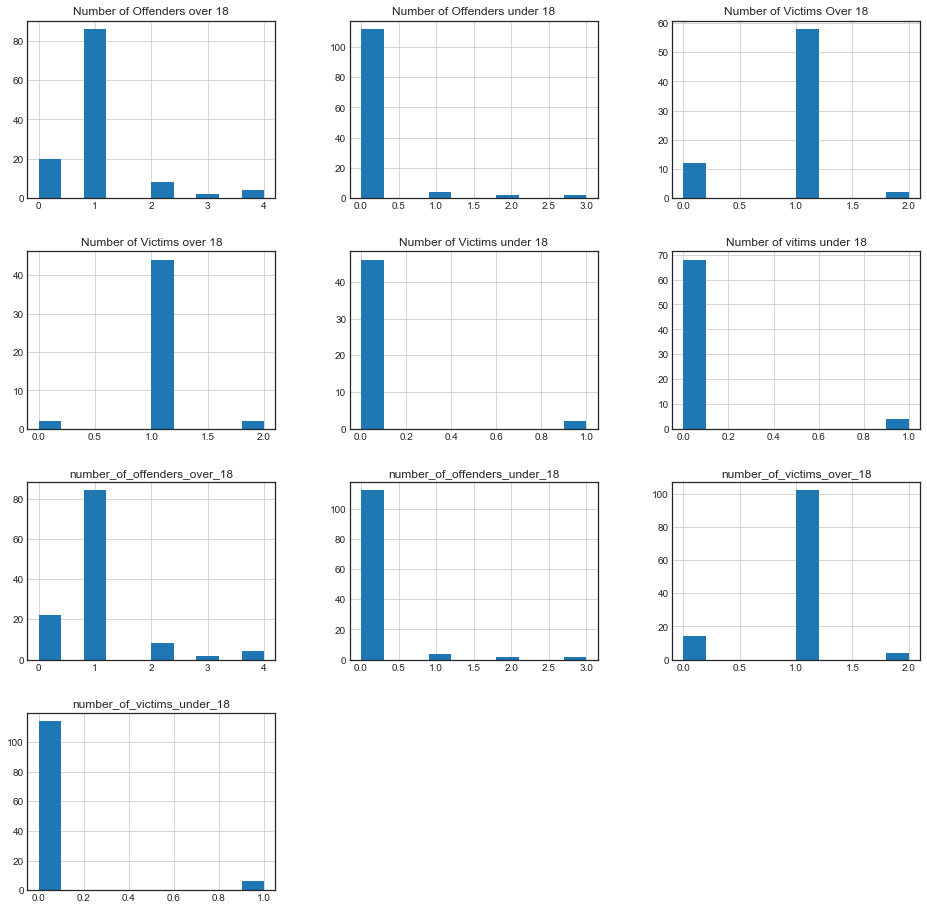

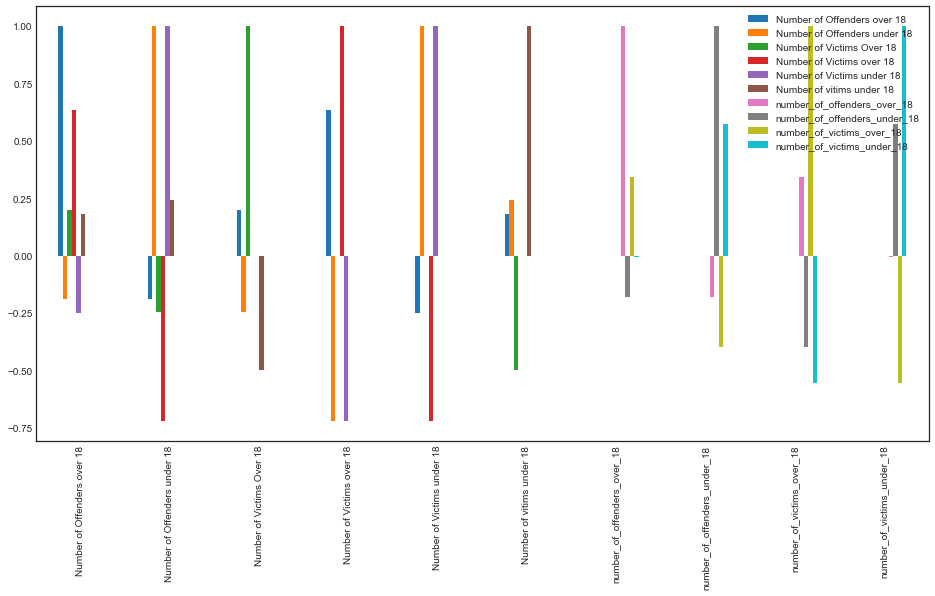

In [7]:
# Examining rough histograms & rough correlations
df.hist(figsize=(16,16))

corr = df.corr()
display(corr)

corr.plot.bar(figsize=(16,8))